In [1]:
from deimkit import list_models, load_model

In [2]:
list_models()

['deim_hgnetv2_n',
 'deim_hgnetv2_s',
 'deim_hgnetv2_m',
 'deim_hgnetv2_l',
 'deim_hgnetv2_x']

In [4]:
model = load_model(
    "deim_hgnetv2_s",
    checkpoint="/home/dnth/Desktop/DEIMKit/nbs/outputs/deim_hgnetv2_s_vehicles/best.pth",
    class_names=[
        "background"
        "vehicles",
        "big bus",
        "big truck",
        "bus-l-",
        "bus-s-",
        "car",
        "mid truck",
        "small bus",
        "small truck",
        "truck-l-",
        "truck-m-",
        "truck-s-",
        "truck-xl-",
    ],
)

2025-03-11 21:52:59.407 | INFO     | deimkit.predictor:__init__:41 - Initializing Predictor with device=auto
2025-03-11 21:52:59.408 | INFO     | deimkit.predictor:__init__:60 - Auto-selected device: cuda
2025-03-11 21:52:59.408 | INFO     | deimkit.predictor:__init__:68 - Using custom checkpoint: /home/dnth/Desktop/DEIMKit/nbs/outputs/deim_hgnetv2_s_vehicles/best.pth
2025-03-11 21:52:59.409 | INFO     | deimkit.predictor:__init__:101 - Loading configuration from model name: deim_hgnetv2_s
/home/dnth/Desktop/DEIMKit/src/deimkit/predictor.py:112: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the f

In [5]:
result = model.predict(
    "/home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-1002_jpg.rf.5e4018e963af1251b3f7e6fd487c479e.jpg",
    visualize=True,
)

2025-03-11 21:53:40.196 | DEBUG    | deimkit.predictor:predict:260 - Loading image from path: /home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-1002_jpg.rf.5e4018e963af1251b3f7e6fd487c479e.jpg
2025-03-11 21:53:40.485 | DEBUG    | deimkit.predictor:predict:300 - Prediction complete. Found 21 objects
2025-03-11 21:53:40.485 | DEBUG    | deimkit.predictor:predict:303 - Generating visualization


In [6]:
result

{'boxes': array([[327.39496, 268.69568, 384.36823, 330.34988],
        [349.70184, 326.94012, 425.20218, 402.12964],
        [385.98816, 186.83006, 414.01855, 214.0932 ],
        [388.21274, 233.43533, 436.89453, 280.41287],
        [319.91315, 232.90721, 363.92102, 282.6544 ],
        [409.77783, 200.30502, 447.96967, 230.23848],
        [357.89078, 198.58649, 391.48132, 228.48859],
        [442.22314, 198.96338, 558.69147, 310.36893],
        [426.12396, 266.7056 , 513.5255 , 352.89252],
        [304.43207, 205.92195, 344.7146 , 242.99796],
        [318.9902 , 147.14297, 348.5013 , 178.21295],
        [386.09256, 397.141  , 510.09396, 476.0432 ],
        [295.11884, 173.59778, 319.9358 , 198.67673],
        [385.10132, 396.3903 , 511.65833, 476.19537],
        [318.9902 , 147.14297, 348.5013 , 178.21295],
        [426.12396, 266.7056 , 513.5255 , 352.89252],
        [234.7126 , 133.9614 , 253.1784 , 149.58769],
        [304.0371 , 198.34818, 340.45142, 224.40788],
        [290.3243 ,

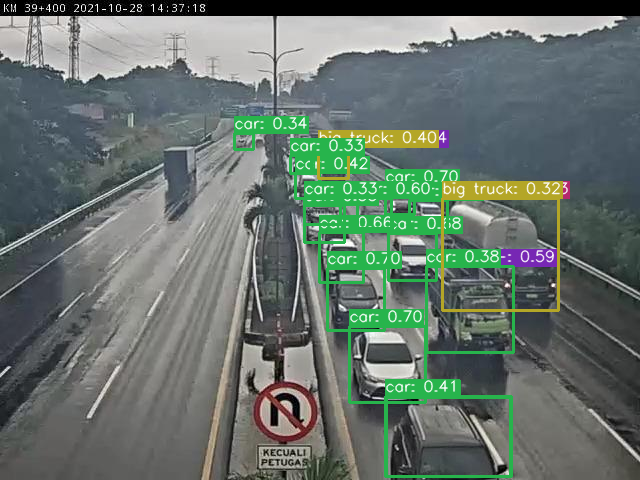

In [7]:
result["visualization"]

In [8]:
# Load folder of images
import glob

image_paths = glob.glob("/home/dnth/Downloads/vehicles.v2-release.coco/test/*.jpg")

image_paths


['/home/dnth/Downloads/vehicles.v2-release.coco/test/aditganteng_mp4-69_jpg.rf.e28fe5f9d24c4d44562807df45d01489.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-966_jpg.rf.ffa722a51958b4374aa3f40558279bec.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/malam_04112021_mp4-25_jpg.rf.0f80f5233fa368809e2b71a3ca281f03.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/malam_04112021_mp4-121_jpg.rf.8d35115898e794407be59bbdb8e92194.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/aditganteng_mp4-633_jpg.rf.5bbff6773514dd4ec46ef7233296ce4e.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-328_jpg.rf.92aab3aa0026ebef9348a340ab90359f.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-1315_jpg.rf.55bb6f192037113ad36fe2db8f3d0ec4.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/siang_15112021_1_mp4-341_jpg.rf.01366c2de405175af4c00bb7a6e6902b.jpg',
 '/home/dnth/Downloads/vehicles.v2-release.coco/test/pagi_1

In [11]:
results = model.predict_batch(image_paths[0:6], conf_threshold=0.2, visualize=True)

2025-03-11 21:54:22.353 | INFO     | deimkit.predictor:predict_batch:338 - Processing batch of 6 images with batch_size=16
2025-03-11 21:54:22.354 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 0 from path: /home/dnth/Downloads/vehicles.v2-release.coco/test/aditganteng_mp4-69_jpg.rf.e28fe5f9d24c4d44562807df45d01489.jpg
2025-03-11 21:54:22.360 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 1 from path: /home/dnth/Downloads/vehicles.v2-release.coco/test/adit_mp4-966_jpg.rf.ffa722a51958b4374aa3f40558279bec.jpg
2025-03-11 21:54:22.367 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 2 from path: /home/dnth/Downloads/vehicles.v2-release.coco/test/malam_04112021_mp4-25_jpg.rf.0f80f5233fa368809e2b71a3ca281f03.jpg
2025-03-11 21:54:22.373 | DEBUG    | deimkit.predictor:predict_batch:351 - Loading image 3 from path: /home/dnth/Downloads/vehicles.v2-release.coco/test/malam_04112021_mp4-121_jpg.rf.8d35115898e794407be59bbdb8e92194.jpg
2025-03-11 2

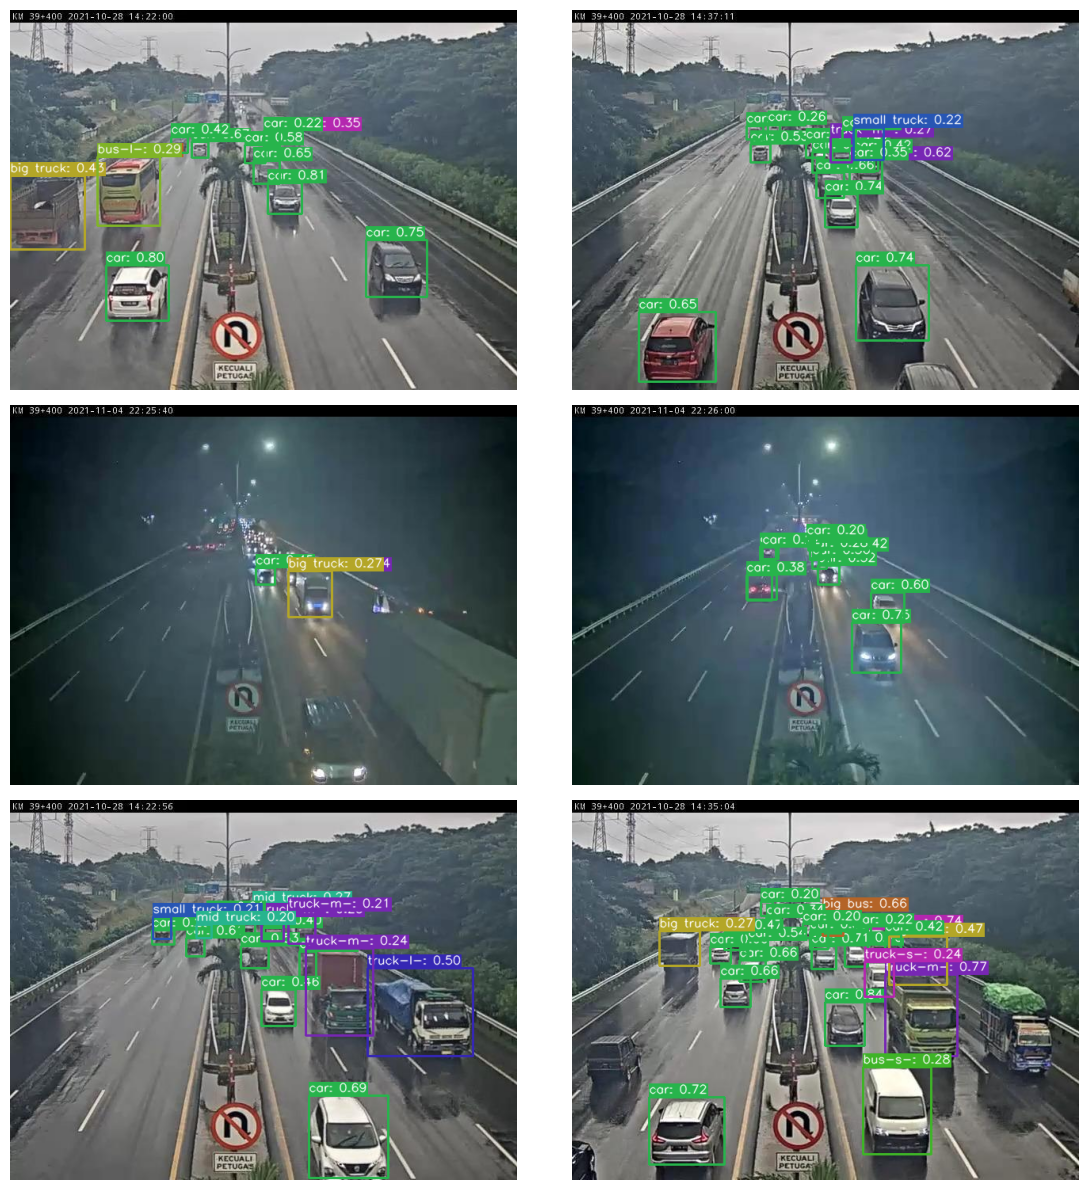

In [12]:
# Plot results in a grid
import matplotlib.pyplot as plt
import math

n_cols = 2
n_rows = math.ceil(len(results) / n_cols)
plt.figure(figsize=(12, 4 * n_rows))

for i, result in enumerate(results):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(result["visualization"])
    plt.axis("off")
plt.tight_layout()
plt.show()